### Computational Guided Inquiry for PChem (Neshyba, 2022)

# Thermodynamic surfaces

## Visualizing state space as thermodynamic surfaces
We've already see how to visualize thermodynamic functions like the pressure on a temperature/volume state space (i.e., $P(T,V)$). But it's also useful to visualize the state space variables themselves, in that same space (i.e., 
$T(T,V)$ and $V(T,V)$). Why? For two reasons: First, doing so will help us understand the meaning behind partial derivatives and the *weird partial derivative* notation that go along with them. And second, doing so will help us understand the   the *no-brainer* rules of partial derivatives, which are very handy when doing thermodynamic derivations. The main goal of this CGI is to help you solidify these ideas.

## Partial derivative notation
Partial derivatives of state functions are ubiquitous in thermodynamics. For example, the slope of the pressure "in the temperature direction," in a temperature/volume state space, can be expressed formally as

$$
\Big( \dfrac {\partial P}{\partial T} \Big) _V \ \ \ \ (1)
$$ 

Likewise, the slope of the pressure "in the volume direction" can be expressed formally as 

$$
\Big( \dfrac {\partial P}{\partial V} \Big) _T \ \ \ \ (2)
$$

Before, we looked at these quantities as individual slices (isochoric and isothermal). Now we're going to be looking at them as full-blown thermodynamic surfaces!


## Two ways of obtaining partial derivatives (slopes) of state functions
One method of taking partial derivatives is *numerical*. Another way is *analytical*. When do you know which method to employ?

If you have an algebraic expression for $P(T,V)$ -- like $P=nRT/V$, then you can use calculus to evaluate its partial derivatives. But suppose somebody has *measured* $P(T,V)$ for a (discrete) set of of temperatures and volumes? In that case, you don't have an analytical representation of $P(T,V)$, so analytical calculus isn't going to do you any good. "Numerical" calculus is your only option. You already know how to do both of these for *slices* through state space; here you'll extend that approach to entire thermodynamic surfaces, using pre-built library functions called dF_dx and dF_dy.

The foregoing is presented as an either-or proposition, but in fact, many physical chemists are more of the "umbrella *and* hat" personality type. In other words, even if we have an algebraic expression for $P(T,V)$, and have gone to the trouble to find an analytical expression for its slope, we're also inclined to find the slope numerically! Why?  Well, maybe the algebraic expression for $P(T,V)$ is really complex, and so the derivative expression is also really complex -- so repeating the work numerically can give us confidence that our calculus skills are still up to snuff. 


## The "no-brainer" rules
Consider for a moment the partial derivative $\Big( \dfrac {\partial T}{\partial T} \Big) _V$. How, you may wonder, does the temperature of a gas change when you change its ... temperature? The answer is, perfectly in sync! "No-brainer #1" is 

$$
\Big( \dfrac {\partial T}{\partial T} \Big) _V=1 \ \ \ \ (3)
$$ 

We'd expect all state variables to behave just like this, like $\Big( \dfrac {\partial V}{\partial V} \Big) _T=1$, and so on. 

Likewise, you might wonder how the temperature of a gas can change when you change its volume *while holding the temperature constant*? Well, it can't. "No-brainer #2" is 

$$
\Big( \dfrac {\partial T}{\partial V} \Big) _T=0 \ \ \ \ (4)
$$ 

For the same reason, we'd also expect $\Big( \dfrac {\partial V}{\partial T} \Big) _V=0$, and so on. In this exercise, you'll be basically verifying these two rules.

## Looking ahead: calculus and observables
In the discussion above, we've been assuming we are given a state function -- either analytically, as in $P=nRT/V$, or numerically, which we load in from a file -- and we're interested in we getting the partial derivatives of that function. But sometimes, want to go the other way around: we're *given* the partial derivative, and we'd like to *construct* from that the corresponding state function. This isn't as weird as it might sound. For example, we can easily measure the *heat capacity* of a substance, $C_P$, with simple lab tools like a thermometer and a hot plate. But $C_P$ is the partial derivative of what's called the enthalpy of a substance: $C_P = \Big( \dfrac {\partial H}{\partial T} \Big) _P$. In that case, it's typical to use integral calculus to construct the enthalpy thermodynamic surfae -- this is done, for example, in differential scanning thermometry experiments. We'll tackle that later on.

## Learning Goals
1. Explain circumstances that dictate whether one would need to take a numerical or analytical derivative.
1. Given an algebraic form of a state function, obtain an analytical expression for its partial derivatives.
1. Given a numerical representation of a state function, obtain and plot its partial derivatives.
1. State the values of the "no-brainer" partials, and how to recognize them.

In [1]:
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import PchemLibrary as PL

In [2]:
%matplotlib notebook

### Loading gridded state-space variables and functions
In the cell below we use numpy's "loadtxt" function to load the state space variables $T$, and call the variable Tgrid. Do something similar for state functions $V$ and $P$, from files Vgrid.txt, and Pgrid.txt; call these variables Vgrid and Pgrid.

In [3]:
# Load the temperature grid
Tgrid = np.loadtxt('Tgrid.txt')
Tgrid = AssignQuantity(Tgrid,'K')
print(np.shape(Tgrid))

# Now load the volume grid
### BEGIN SOLUTION
Vgrid = np.loadtxt('Vgrid.txt')
Vgrid = AssignQuantity(Vgrid,'L')
print(np.shape(Vgrid))
### END SOLUTION

# Now load the pressure grid
### BEGIN SOLUTION
Pgrid = np.loadtxt('Pgrid.txt')
Pgrid = AssignQuantity(Pgrid,'atm')
print(np.shape(Pgrid))
### END SOLUTION

(51, 42)
(51, 42)
(51, 42)


### Visualizing $T(T,V)$
The next cell plots $T(T,V)$.

<IPython.core.display.Javascript object>


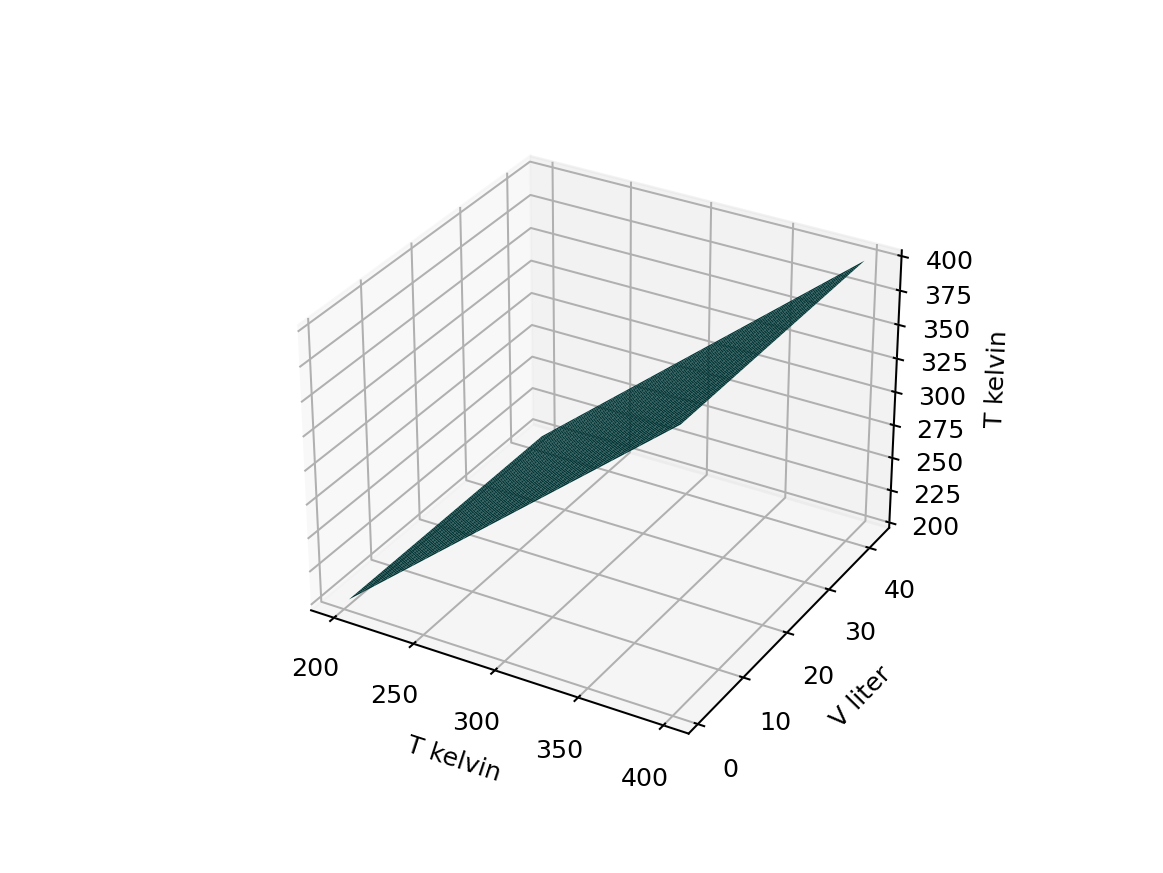

Text(0.5, 0, 'T kelvin')

In [4]:
# Prep the axis labels
xlabel = "T "+str(Tgrid.units)
ylabel = "V "+str(Vgrid.units) 
zlabel = "T "+str(Tgrid.units)

# Graph the temperature
ax = PL.plot_surface(Tgrid, Vgrid, Tgrid, color='teal') # Make the mesh plot T(T,V)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

### Your Turn: visualizing $V(T,V)$
In the cell below, make a 3d plot of $V(T,V)$ (and label the axes appropriately).

<IPython.core.display.Javascript object>


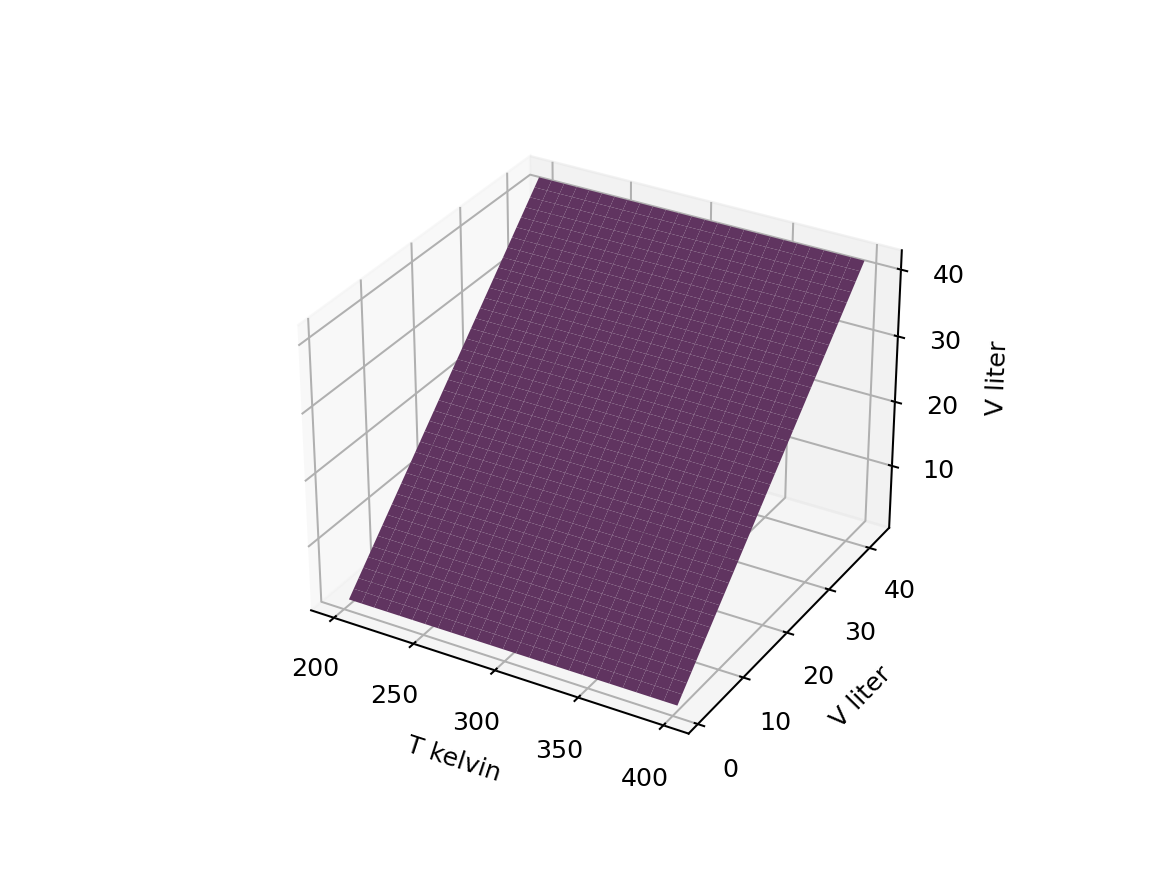

Text(0.5, 0, 'V liter')

In [5]:
# Prep the axis labels
### BEGIN SOLUTION
xlabel = "T "+str(Tgrid.units)
ylabel = "V "+str(Vgrid.units) 
zlabel = "V "+str(Vgrid.units)
### END SOLUTION

# Graph the volume and add labels
### BEGIN SOLUTION
ax = PL.plot_surface(Tgrid, Vgrid, Vgrid, color='violet') # Make the mesh plot V(T,V)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
### END SOLUTION

### Visualizing $\Big( \dfrac {\partial T}{\partial T} \Big) _V $
Next we're going to have a look at a numerical version of $\Big( \dfrac {\partial T}{\partial T} \Big) _V $, using the PchemLibrary function PL.dF_dx. Study the cell below to see how this works. Import points to note are:

- PL.dF_dx takes the derivative in the "x" direction, which corresponds to the temperature.
- Because of that, the grids that are returned by PL.df_dx are shorter in the temperature direction.

Shape of partial derivative = (50, 42)
Units of partial derivative = dimensionless


<IPython.core.display.Javascript object>


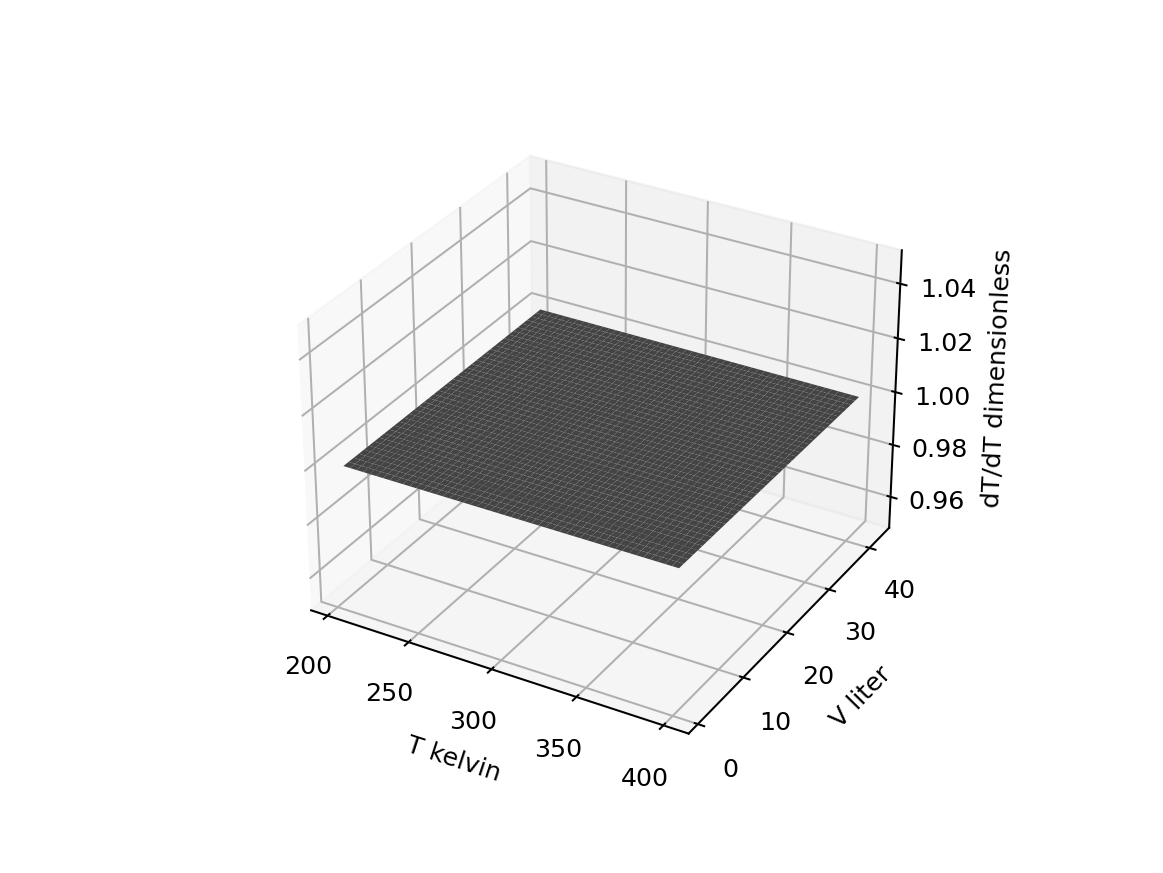

Text(0.5, 0, 'dT/dT dimensionless')

In [6]:
# Get the partial derivative in the temperature direction (using PL.dF_dx))
Tgridnew, Vgridnew, dTgrid_dT = PL.dF_dx([Tgrid,Vgrid],Tgrid)

# Prepping the axis labels
xlabel = "T "+str(Tgridnew.units)
ylabel = "V "+str(Vgridnew.units) 
zlabel = "dT/dT "+str(dTgrid_dT.units)

# Graph the derivative
ax = PL.plot_surface(Tgridnew, Vgridnew, dTgrid_dT, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

### Pause for analysis
Does the function you just look like what you expected? (Refer to Eqs. 3 or 4 in your response).

### Your turn
In the cell below, calculate and plot the 3d surface $\Big( \dfrac {\partial T}{\partial V} \Big) _T $. It's a lot like what you just did, but you'll use the PchemLibrary function PL.dF_dy (instead of PL.dF_dx). Import points to note are:

- PL.dF_dy takes the derivative in the "y" direction, because that direction corresponds to the volume.
- Because of that, the grids that are returned by PL.df_dy are shorter in the volume direction.

Shape of partial derivative = (51, 41)
Units of partial derivative = kelvin / liter


<IPython.core.display.Javascript object>


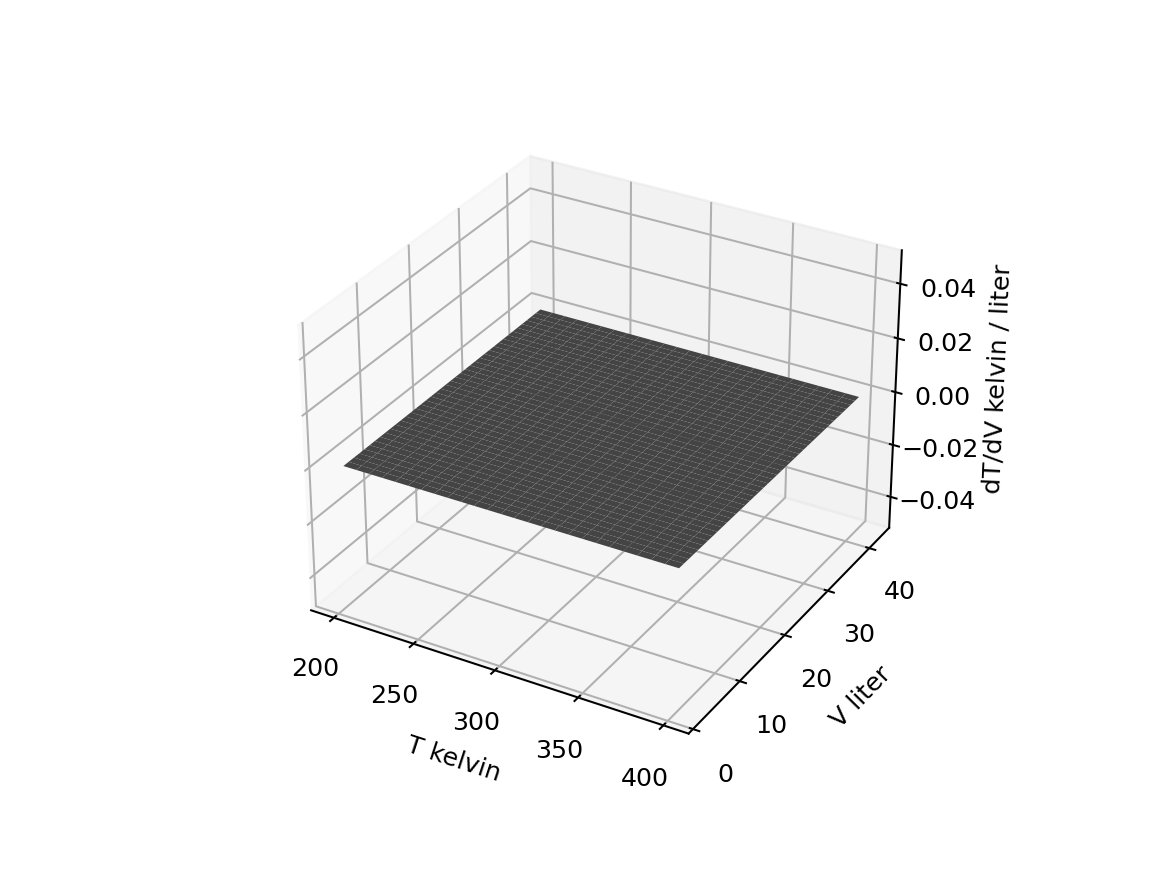

Text(0.5, 0, 'dT/dV kelvin / liter')

In [7]:
# Get the partial derivative
### BEGIN SOLUTION
Tgridnew, Vgridnew, dTgrid_dV = PL.dF_dy([Tgrid,Vgrid],Tgrid)
### END SOLUTION

# Prep the axis labels
### BEGIN SOLUTION
xlabel = "T "+str(Tgridnew.units)
ylabel = "V "+str(Vgridnew.units) 
zlabel = "dT/dV "+str(dTgrid_dV.units)
### END SOLUTION

# Graph the derivative
### BEGIN SOLUTION
ax = PL.plot_surface(Tgridnew, Vgridnew, dTgrid_dV, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
### END SOLUTION

### Pause for analysis
Does this function look like what you expected?

### Visualizing the pressure of a gas.
In the cell below, make a 3d graph of the $P(T,V)$ grid you loaded in at the top of this exercise (and label appropriately).

<IPython.core.display.Javascript object>


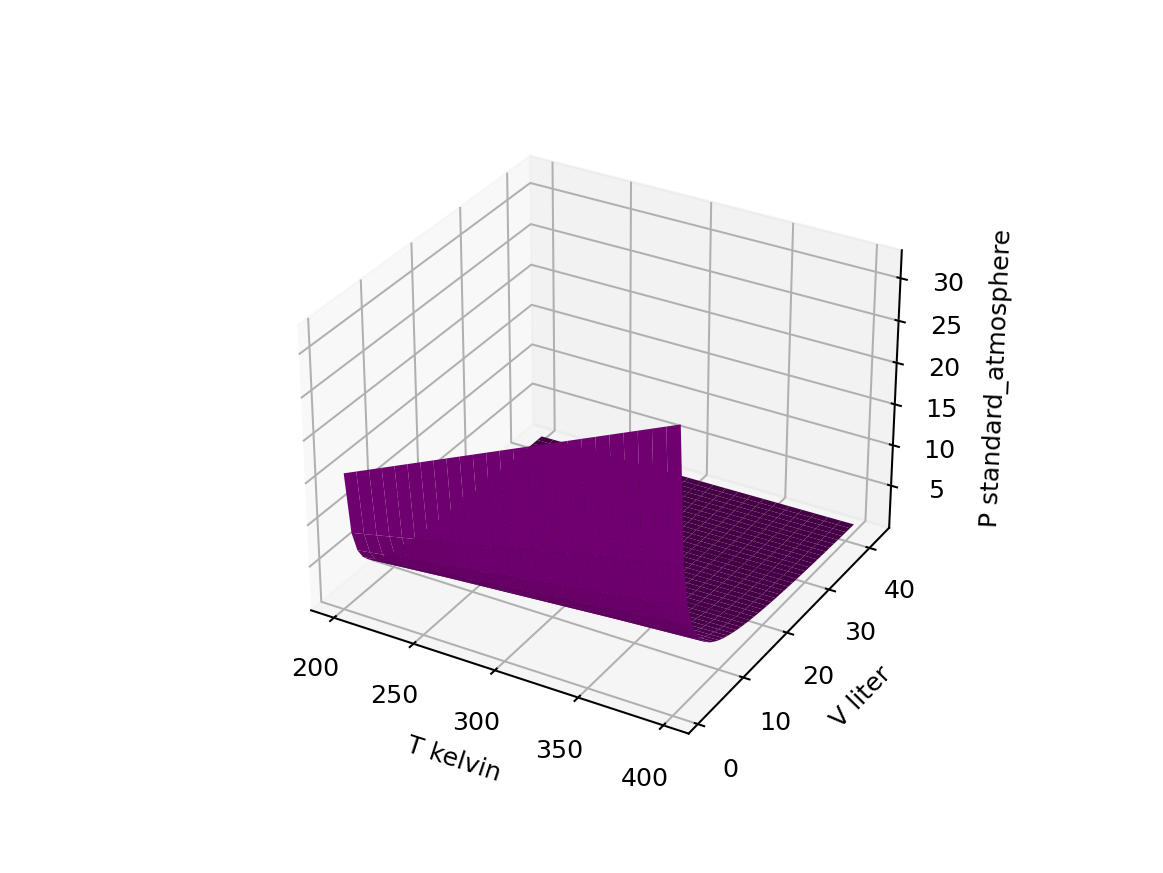

Text(0.5, 0, 'P standard_atmosphere')

In [8]:
# Prep the axis labels
### BEGIN SOLUTION
xlabel = "T "+str(Tgrid.units)
ylabel = "V "+str(Vgrid.units) 
zlabel = "P "+str(Pgrid.units)
### END SOLUTION

# Graph the pressure using PL.plot_surface and add labels
### BEGIN SOLUTION
ax = PL.plot_surface(Tgrid, Vgrid, Pgrid, color='purple')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
### END SOLUTION

### Using dF_dx to get $\Big( \dfrac {\partial P}{\partial T} \Big) _V$

The cell below shows how to use the numerical derivative function dF_dx to evaluate $\Big( \dfrac {\partial P}{\partial T} \Big) _V$.


Shape of partial derivative = (50, 42)
Units of partial derivative = standard_atmosphere / kelvin


<IPython.core.display.Javascript object>


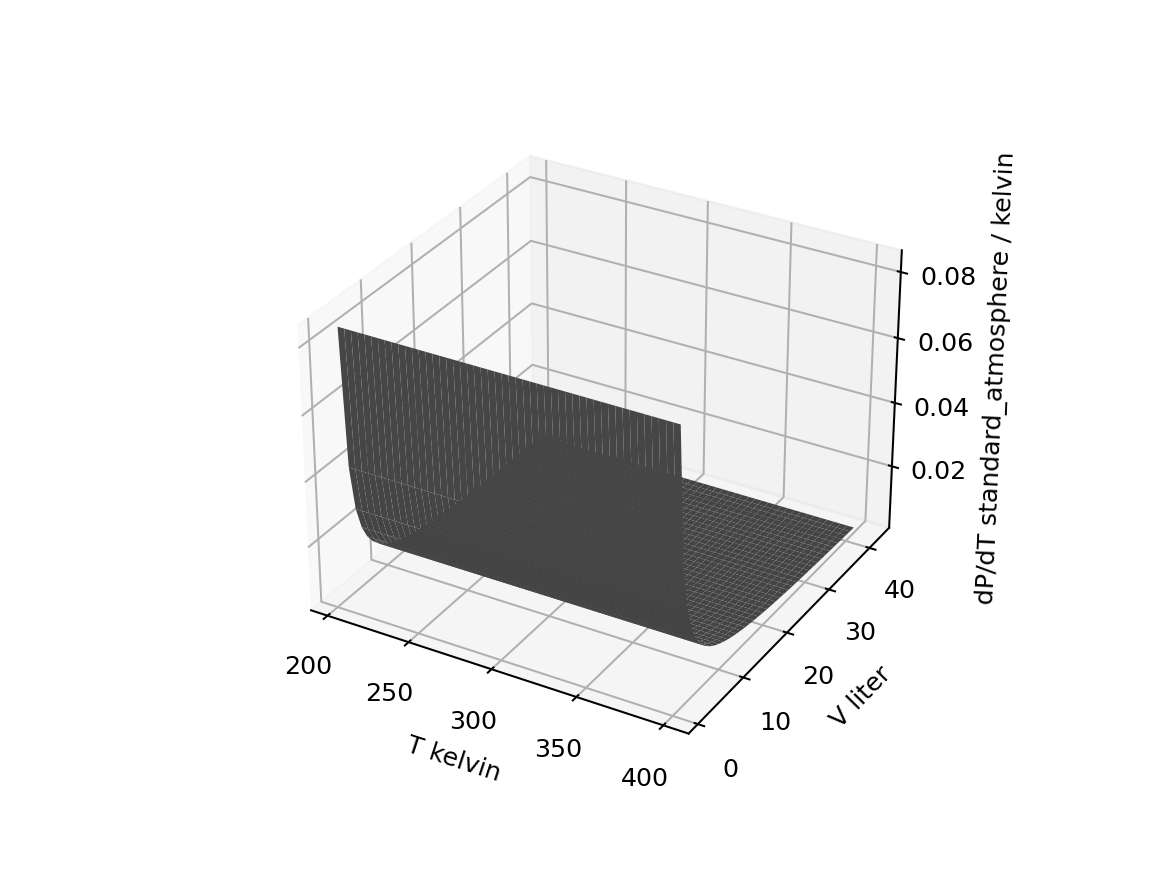

Text(0.5, 0, 'dP/dT standard_atmosphere / kelvin')

In [9]:
# Get a numerical partial derivative: (dP/dT) holding V constant
Tgridnew, Vgridnew, dPgrid_dT = PL.dF_dx([Tgrid,Vgrid],Pgrid)

# Prepping the axis labels
xlabel = "T "+str(Tgridnew.units)
ylabel = "V "+str(Vgridnew.units) 
zlabel = "dP/dT "+str(dPgrid_dT.units)

# Graph the derivative
ax = PL.plot_surface(Tgridnew, Vgridnew, dPgrid_dT, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

### Your turn: Using dF_dy to get $\Big( \dfrac {\partial P}{\partial V} \Big) _T$


In the cell below, use the numerical derivative function dF_dy to evaluate $\Big( \dfrac {\partial P}{\partial V} \Big) _T$. 

Shape of partial derivative = (51, 41)
Units of partial derivative = standard_atmosphere / liter


<IPython.core.display.Javascript object>


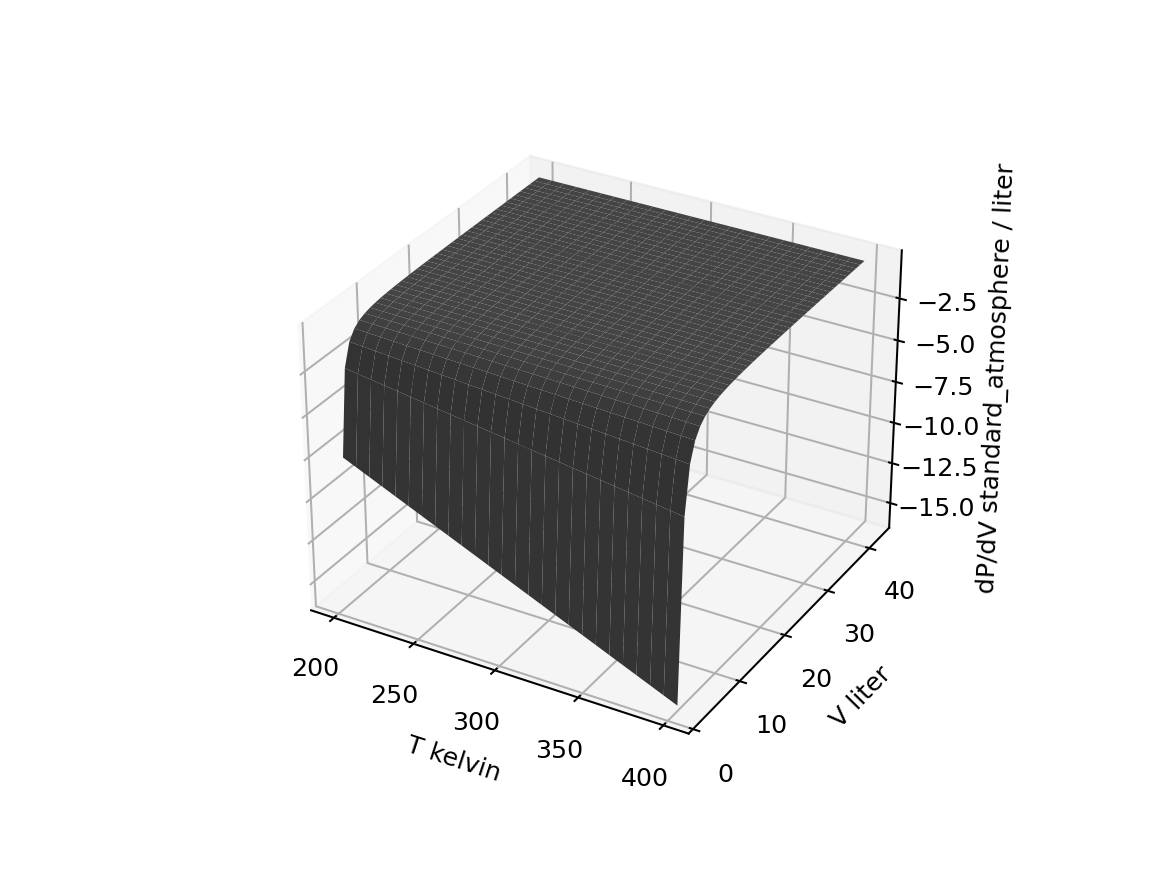

Text(0.5, 0, 'dP/dV standard_atmosphere / liter')

In [10]:
# Get a numerical partial derivative: (dP/dV) holding T constant
### BEGIN SOLUTION
Tgridnew, Vgridnew, dPgrid_dV = PL.dF_dy([Tgrid,Vgrid],Pgrid)
### END SOLUTION

# Prep the axis labels
### BEGIN SOLUTION
xlabel = "T "+str(Tgridnew.units)
ylabel = "V "+str(Vgridnew.units) 
zlabel = "dP/dV "+str(dPgrid_dV.units)
### END SOLUTION

# Graph the derivative
### BEGIN SOLUTION
ax = PL.plot_surface(Tgridnew, Vgridnew, dPgrid_dV, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
### END SOLUTION

### Analytical partial derivatives of the ideal gas
As mentioned above, if you have an algebraic expression for the pressure of a gas as a function of its temperature and volume, it's a matter of calculus to find analytical expressions for its partial derivatives. That's what we do in the next cell -- specifically, $\Big( \dfrac {\partial P}{\partial V} \Big) _T$. Notice that since this is an analytical result, there's not shortening of the state space, like we had to do with a numerical approach.

1 mole
0.082057 liter * standard_atmosphere / kelvin / mole


<IPython.core.display.Javascript object>


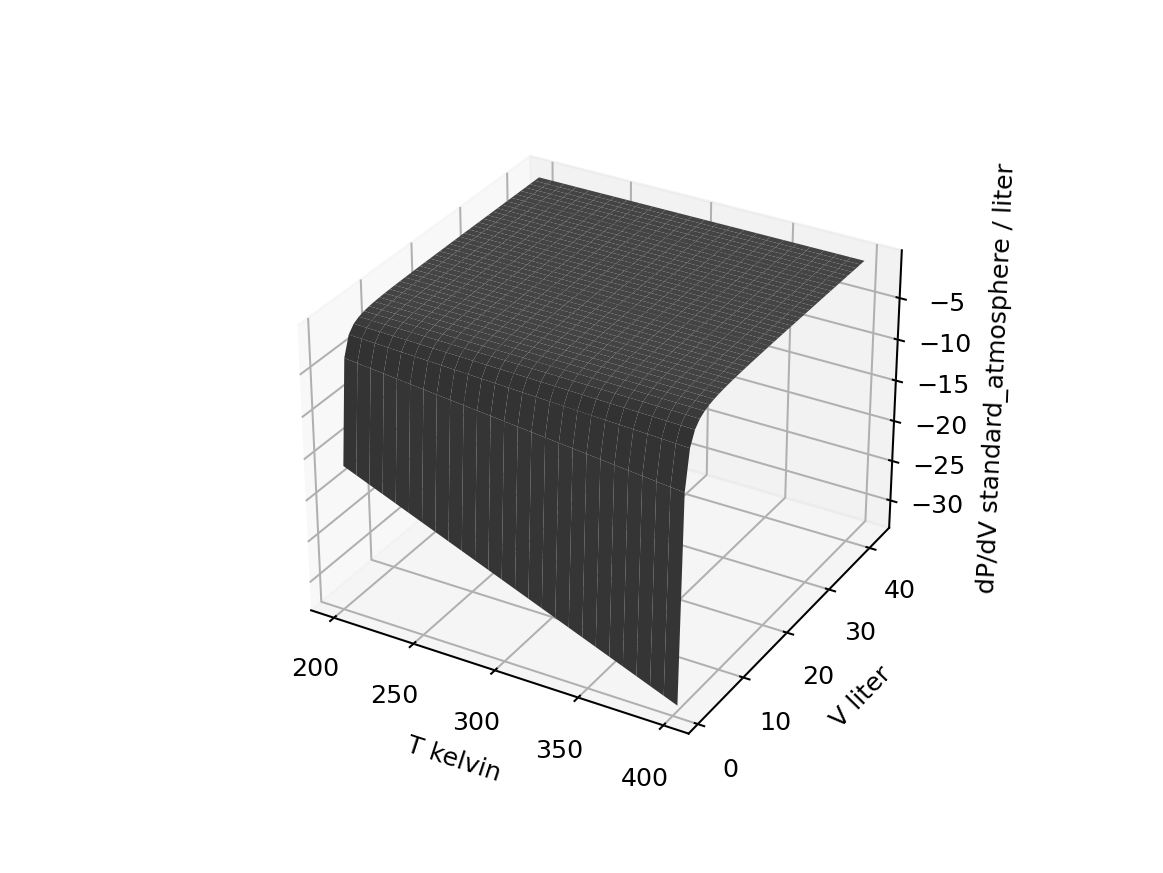

Text(0.5, 0, 'dP/dV standard_atmosphere / liter')

In [11]:
# Specify the number of moles, and the gas constant
n = AssignQuantity(1,"mol"); print(n)
R = AssignQuantity(0.082057,"L atm /(mol K)"); print(R)

# Get dP/dV from calculus; call the result dPgrid_dV_analytical
dPgrid_dV_analytical = -n*R*Tgrid/Vgrid**2

# Prep the axis labels
xlabel = "T "+str(Tgridnew.units)
ylabel = "V "+str(Vgridnew.units) 
zlabel = "dP/dV "+str(dPgrid_dV_analytical.units)

# Graph the analytical derivative
ax = PL.plot_surface(Tgrid, Vgrid, dPgrid_dV_analytical, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

### Your challenge: Analytical partial derivatives of a van der Waals gas
This is a lot like what we just did for an ideal gas, but now you'll try it with Ar gas, treated as a van der Waals gas. Remember, this is *not* a numerical derivative, but an *analytical* one! It might help to derive an algebraic expression for $\Big( \dfrac {\partial P}{\partial V} \Big) _T$ for a van der Waals gas, on paper, first. 

By the way, given that Argon, as a van der Waals gas, is pretty close to ideal, you can expect these results to also look pretty similar to what you got for an ideal gas.

1 mole
0.082057 liter * standard_atmosphere / kelvin / mole
1.355 bar * liter ** 2 / mole ** 2
0.032 liter / mole


<IPython.core.display.Javascript object>


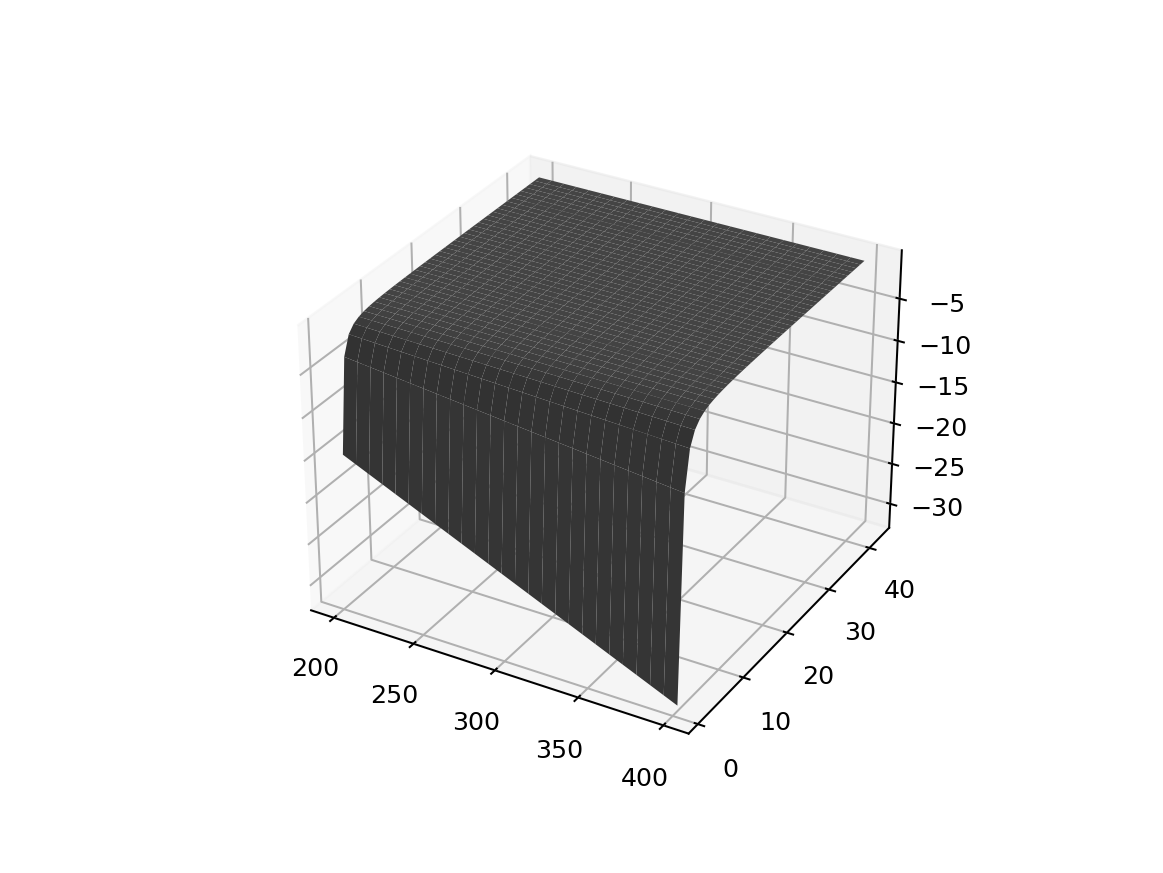

<IPython.core.display.Javascript object>


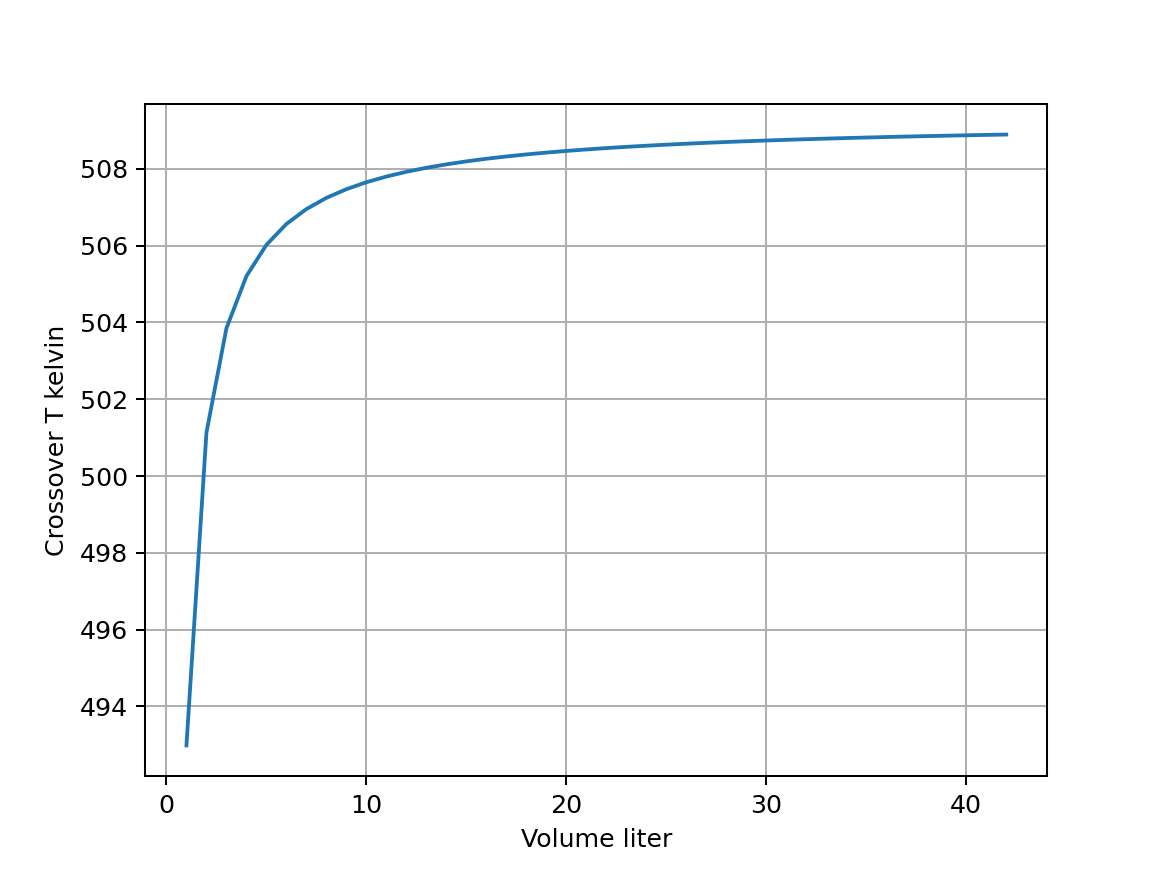

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0, 0.5, 'Crossover T kelvin')

In [21]:
# Assign moles, and the gas constant
n = AssignQuantity(1,"mol"); print(n)
R = AssignQuantity(0.082057,"L atm /(mol K)"); print(R)

# Assign van der Waals constants "a" and "b" for Argon
a = AssignQuantity(1.355,'L^2 bar / mol^2'); print(a)
b = AssignQuantity(0.032,'L /mol'); print(b)

# Get dP/dV analytically ... and with a minimum of parentheses
### BEGIN SOLUTION
dPgrid_dV_analytical = -n*R*Tgrid/(Vgrid-n*b)**2 + 2*n**2*a/Vgrid**3
### END SOLUTION

# Prep the axis labels
### BEGIN SOLUTION
xlabel = "T "+str(Tgridnew.units)
ylabel = "V "+str(Vgridnew.units) 
zlabel = "dP/dV "+str(dPgrid_dV_analytical.units)
### END SOLUTION

# Graph the derivative
### BEGIN SOLUTION
PL.plot_surface(Tgrid, Vgrid, dPgrid_dV_analytical, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

# This is not part of the solution, but handy for understanding the Boyle temperature
V = Vgrid[0,:]
TBoyle = ((n*R)**-1 / (1/(V-n*b)-1/V))*n**2*a/V**2
TBoyle.ito('K')
plt.figure()
plt.plot(V,TBoyle)
plt.grid(True)
plt.xlabel('Volume '+str(V.units))
plt.ylabel('Crossover T '+str(TBoyle.units))

### END SOLUTION

### Pause for analysis
Does this function look like what you expected?

### Refresh/save/validate
Almost done! To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page